In [1]:
from skimage import io, color, filters, morphology, measure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2


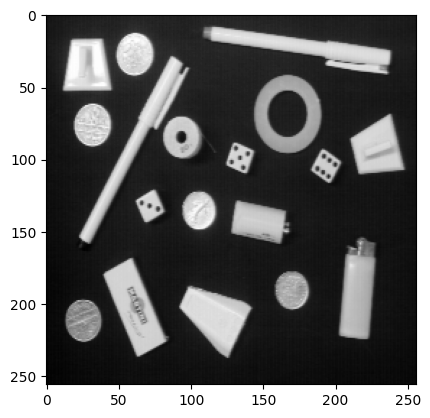

In [2]:
# Cargar la imagen en escala de grises
image = io.imread('Data/OBJECTS.png')
gray_image = color.rgb2gray(image)
plt.imshow(gray_image, cmap='gray')

In [3]:
smoothed_image = filters.gaussian(gray_image, sigma=1)

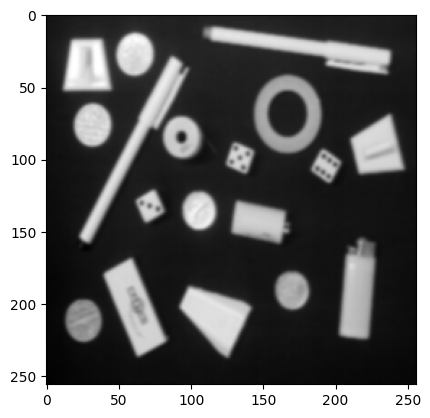

In [4]:
plt.imshow(smoothed_image, cmap='gray')
plt.show()
#

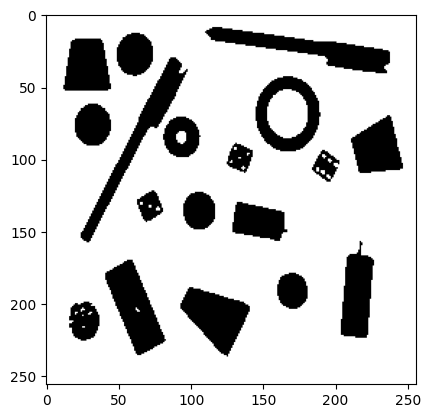

In [5]:
# Aplicar umbralización manual para segmentar los objetos
threshold = 0.4  
binary_image = smoothed_image < threshold
plt.imshow(binary_image, cmap='gray')
plt.show()


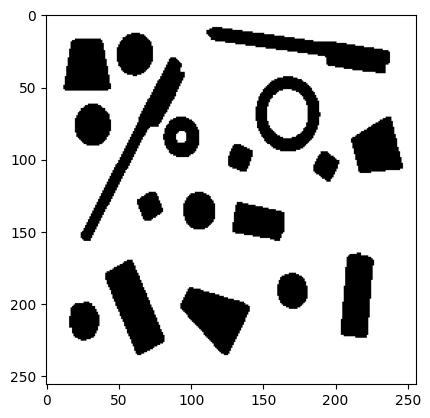

In [6]:
# Aplicar operaciones morfológicas (apertura y cierre) para refinar la segmentación
opened_image = morphology.opening(binary_image, morphology.square(3))
closed_image = morphology.closing(opened_image, morphology.square(3))
plt.imshow(closed_image, cmap='gray')
plt.show()


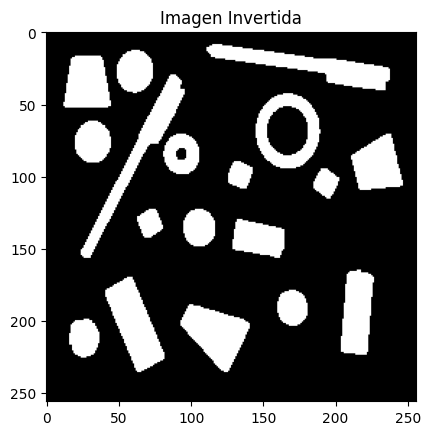

In [8]:
# Invertir la imagen binaria
inverted_image = np.invert(closed_image)

plt.imshow(inverted_image, cmap='gray')
plt.title('Imagen Invertida')
plt.show()


In [9]:
#Identificando y etiquetando regiones
labels = measure.label(inverted_image, connectivity=2, background=0)
mask = np.zeros(inverted_image.shape, dtype='uint8')
print(f'Se encontraron {len(np.unique(labels))} regiones.')

Se encontraron 19 regiones.


Etiqueta: 0 (fondo)
Etiqueta: 1


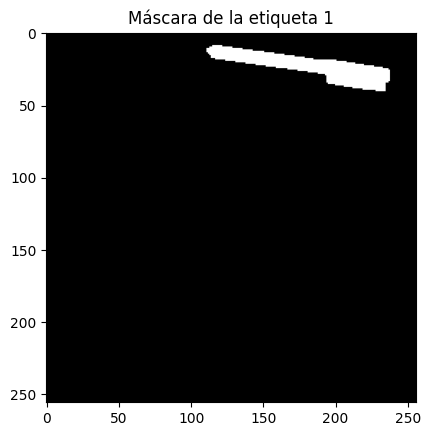

Etiqueta: 2


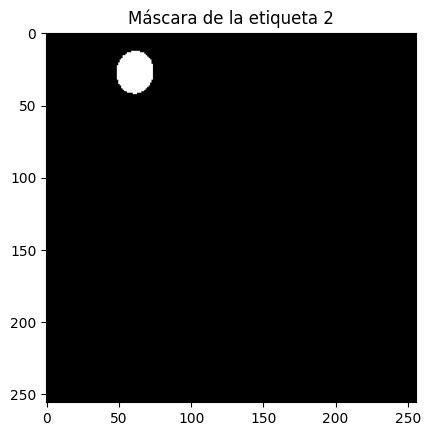

Etiqueta: 3


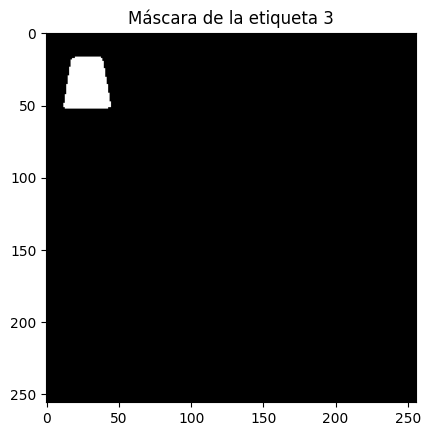

Etiqueta: 4


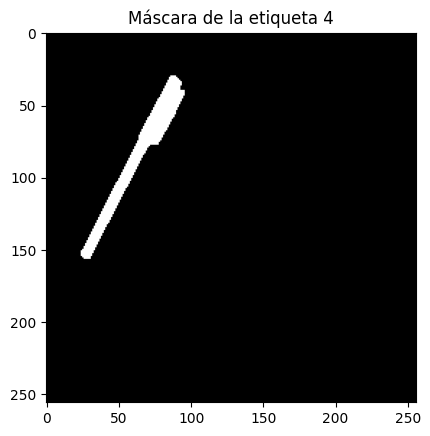

Etiqueta: 5


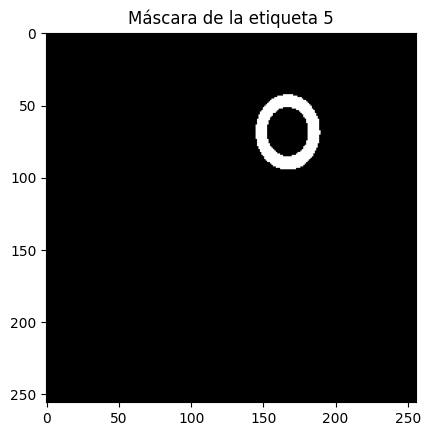

Etiqueta: 6


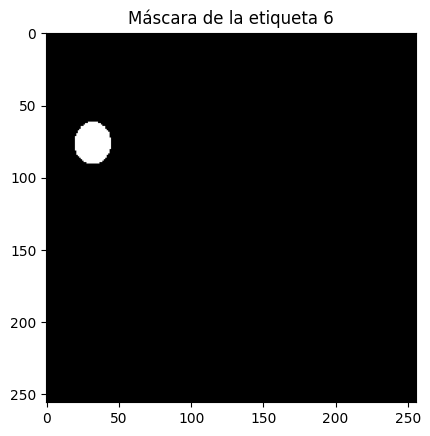

Etiqueta: 7


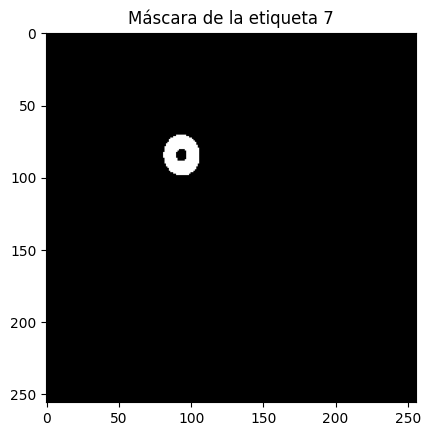

Etiqueta: 8


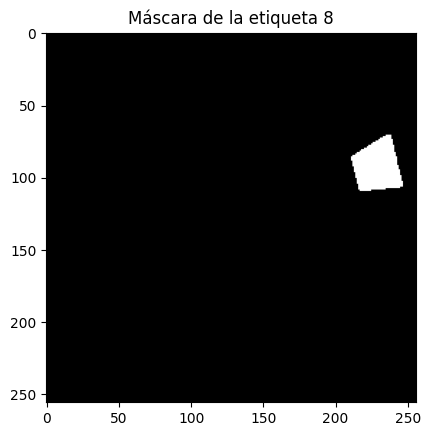

Etiqueta: 9


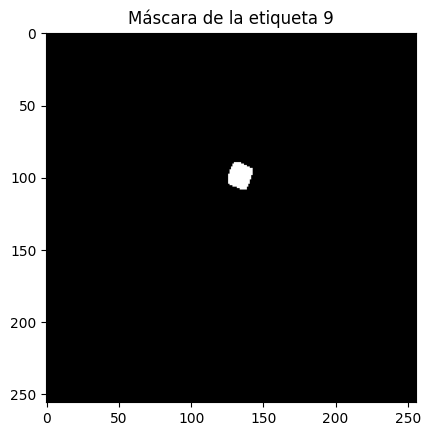

Etiqueta: 10


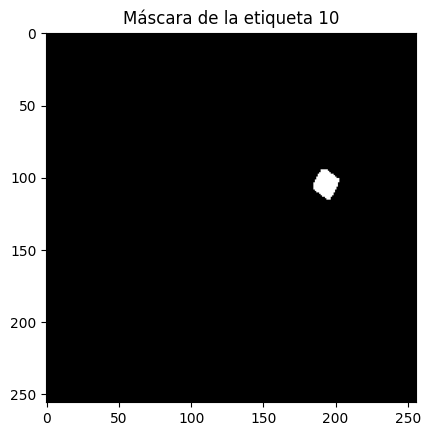

Etiqueta: 11


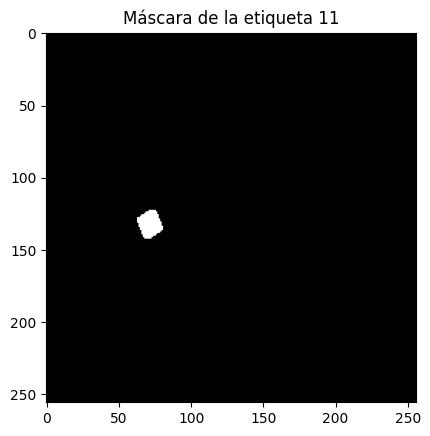

Etiqueta: 12


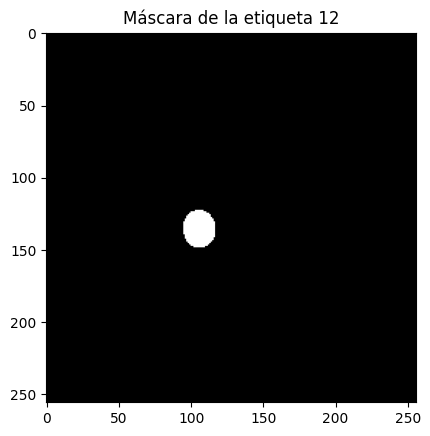

Etiqueta: 13


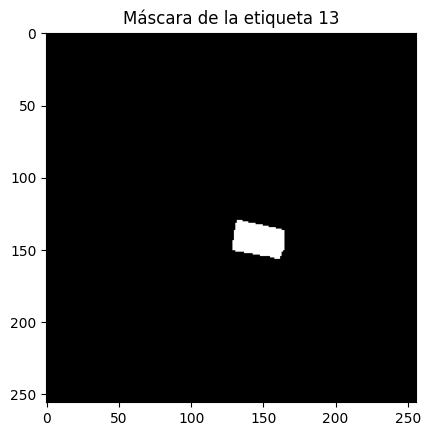

Etiqueta: 14


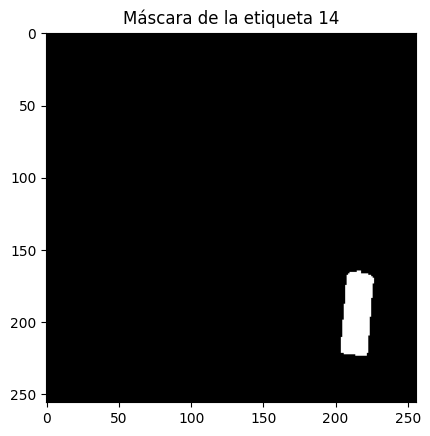

Etiqueta: 15


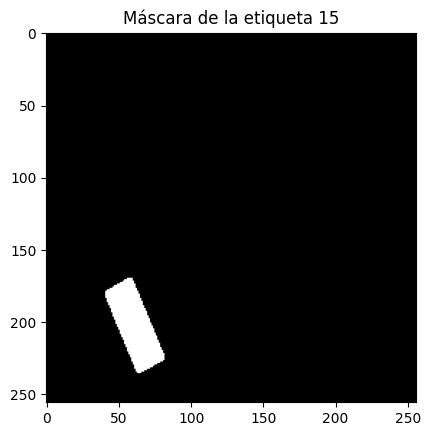

Etiqueta: 16


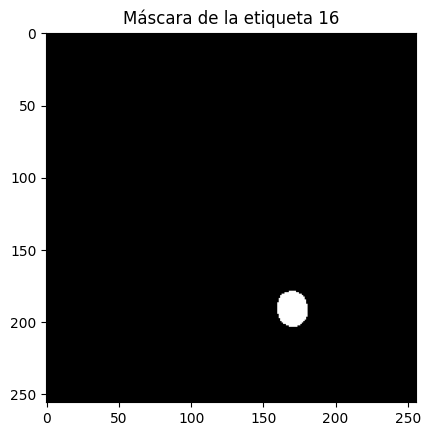

Etiqueta: 17


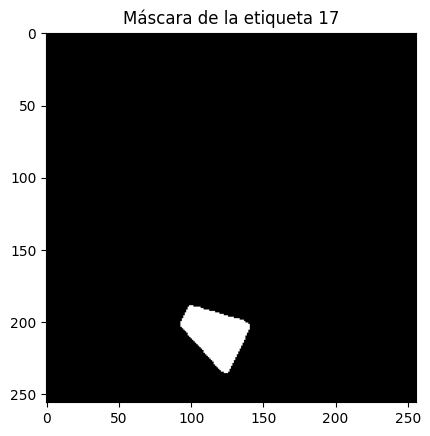

Etiqueta: 18


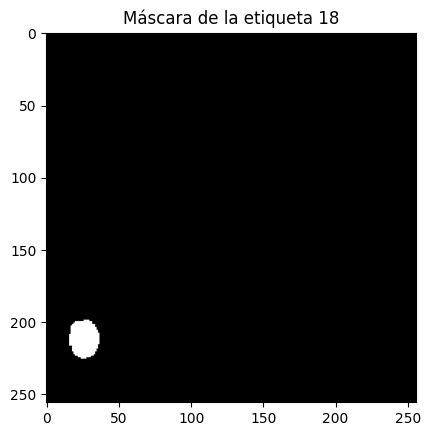

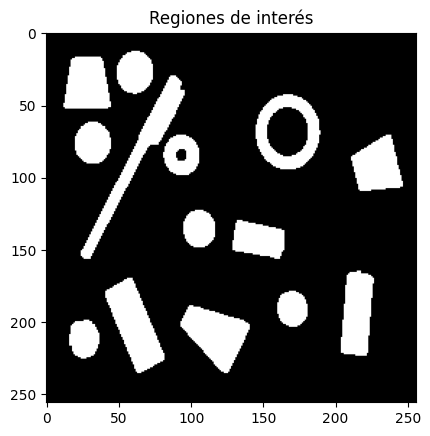

In [10]:
mask = np.zeros(inverted_image.shape, dtype='uint8')


# Ciclamos sobre cada etiqueta.
for i, label in enumerate(np.unique(labels)):
    if label == 0:
        print('Etiqueta: 0 (fondo)')
        continue

    # Construimos una máscara para mostrar sólo las componentes conectadas de la etiqueta actual.
    print(f'Etiqueta: {label}')
    label_mask = np.zeros(inverted_image.shape, dtype='uint8')
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)

    # Si el número de píxeles en la componente es suficientemente grande, probablemente sea una región de interés,
    # por lo que la agregamos a nuestra máscara final.
    if 300 < num_pixels < 1500: 
        mask = cv2.add(mask, label_mask)

    # Mostramos la máscara de *esta* etiqueta.
    plt.imshow(label_mask, cmap='gray')
    plt.title(f'Máscara de la etiqueta {label}')
    if label==1:
      image1 = label_mask
    if label==4:
      image2 = label_mask
    plt.show()

    plt.show()

# Mostramos las componentes más grandes (es decir, regiones de interés).
plt.imshow(mask, cmap='gray')
plt.title('Regiones de interés')
plt.show()

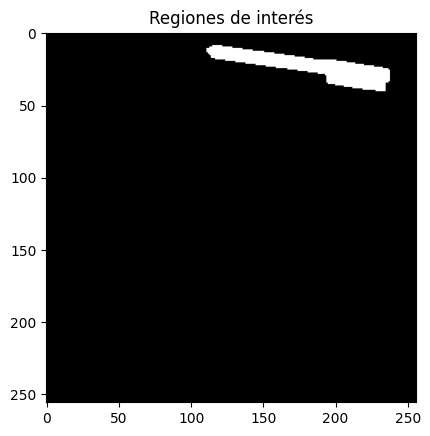

In [11]:
plt.imshow(image1, cmap='gray')

plt.title('Regiones de interés')
plt.show()

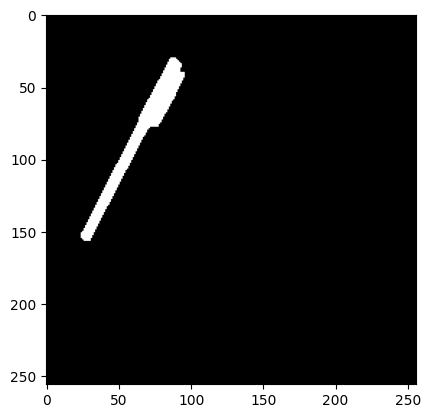

In [12]:
plt.imshow(image2, cmap='gray')

In [13]:
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

In [14]:
resultado = cv2.bitwise_or(image1, image2)

In [15]:
resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

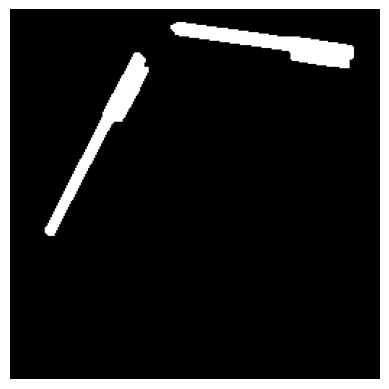

In [16]:
plt.imshow(resultado_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()

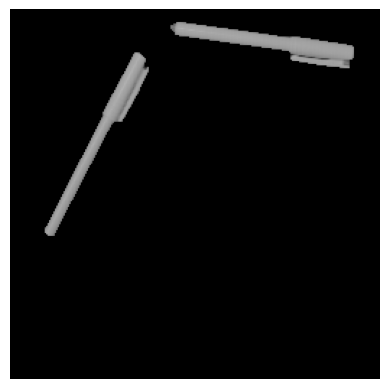

In [17]:
image3= cv2.imread('Data/OBJECTS.png')
resultado = cv2.bitwise_and(resultado_rgb, image3)
resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)
plt.imshow(resultado_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()